# COMP402
Code used in Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
f = "merged_HG00129.txt"

In [3]:
df = pd.read_csv(f, header=None)
df = df.astype(str)

df

,0
0,chr10:102885491-102885839/ 120 4 124 chr10:102...
1,chr10:103337767-103338096/ 124 22 146 chr10:10...
2,chr10:10451447-10451779/ 20 80 100 chr10:10451...
3,chr10:105917786-105918126/ 82 32 114 chr10:105...
4,chr10:10666573-10666897/ 38 70 108 chr10:10666...
...,...
1832,chrX:88488057-88488366/ 16 40 56 chrX:88488072...
1833,chrX:94309970-94310312/ 66 4 70 chrX:94309987 0/0
1834,chrX:96751638-96751966/ 40 12 52 chrX:96751651...
1835,chrX:96939661-96939977/ 46 0 46 chrX:96939674 0/0


In [4]:
# split column into multiple columns by delimiter 
df = df[0].str.split(' ', expand=True)
df

,0,1,2,3,4,5
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0/0


In [5]:
# locus = dir_name
df.columns = ["locus1", "f2_count_REF", "f2_count_ALT", "f2_count", "locus2", "genotype"]

In [6]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df = df.astype(dict_type_convert)
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0/0


In [7]:
df["locus1"] = df["locus1"].str.split("/").str[0]
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977,46,0,46,chrX:96939674,0/0


In [8]:
df.groupby(by="genotype")["f2_count_REF"].mean()

genotype
./.    103.333333
0/0    121.331887
0/1     67.265823
1/1     33.698630
Name: f2_count_REF, dtype: float64

In [9]:
df["genotype"] = df["genotype"].map({"0/0":0,
                             "0/1":1,
                             "1/1":2,
                             "./.":3,
                             np.nan:4},
                             na_action=None)
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839,120,4,124,chr10:102885500,0
1,chr10:103337767-103338096,124,22,146,chr10:103337782,0
2,chr10:10451447-10451779,20,80,100,chr10:10451456,2
3,chr10:105917786-105918126,82,32,114,chr10:105917801,1
4,chr10:10666573-10666897,38,70,108,chr10:10666580,2
...,...,...,...,...,...,...
1832,chrX:88488057-88488366,16,40,56,chrX:88488072,1
1833,chrX:94309970-94310312,66,4,70,chrX:94309987,0
1834,chrX:96751638-96751966,40,12,52,chrX:96751651,0
1835,chrX:96939661-96939977,46,0,46,chrX:96939674,0


In [10]:
df.info()
#df = df["genotype"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   locus1        1837 non-null   object
 1   f2_count_REF  1837 non-null   int32 
 2   f2_count_ALT  1837 non-null   int32 
 3   f2_count      1837 non-null   int32 
 4   locus2        1837 non-null   object
 5   genotype      1837 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 64.7+ KB


In [11]:
f2 = "HG129_overlap_bkpt_MAPQ1_regions.txt"
df_breakpoints = pd.read_csv(f2, sep=",", header=None)
df_breakpoints

,0,1,2,3,4,5,6
0,chr10:102885491-102885839,0,0,0,0,0,0
1,chr10:103337767-103338096,0,0,0,0,0,0
2,chr10:10451447-10451779,0,0,0,0,0,0
3,chr10:105917786-105918126,0,0,0,0,0,0
4,chr10:10666573-10666897,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1832,chrX:88488057-88488366,0,0,14,0,0,15
1833,chrX:94309970-94310312,7,14,0,15,34,0
1834,chrX:96751638-96751966,5,4,0,8,14,0
1835,chrX:96939661-96939977,0,13,0,8,35,0


In [12]:
# $d2
# $count_overlap_ref_bkpt_l
# $count_overlap_ref_bkpt_r
# $count_overlap_alt_bkpt
# $count_overlap_ref_bkpt_l_region
# $count_overlap_ref_bkpt_r_region
# $count_overlap_alt_bkpt_region"
df_breakpoints.columns = ["locus1", "count_REF_bkpt_l", "count_REF_bkpt_r", "count_ALT_bkpt", "count_REF_bkpt_l_region", "count_REF_bkpt_r_region", "count_ALT_bkpt_region"]
df_breakpoints

,locus1,count_REF_bkpt_l,count_REF_bkpt_r,count_ALT_bkpt,count_REF_bkpt_l_region,count_REF_bkpt_r_region,count_ALT_bkpt_region
0,chr10:102885491-102885839,0,0,0,0,0,0
1,chr10:103337767-103338096,0,0,0,0,0,0
2,chr10:10451447-10451779,0,0,0,0,0,0
3,chr10:105917786-105918126,0,0,0,0,0,0
4,chr10:10666573-10666897,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1832,chrX:88488057-88488366,0,0,14,0,0,15
1833,chrX:94309970-94310312,7,14,0,15,34,0
1834,chrX:96751638-96751966,5,4,0,8,14,0
1835,chrX:96939661-96939977,0,13,0,8,35,0


In [13]:
##: Mystery: This cell needs to be run twice to run properly
df = df.merge(df_breakpoints, on = 'locus1', how = 'left')
y = df["genotype"].to_numpy()
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype,count_REF_bkpt_l,count_REF_bkpt_r,count_ALT_bkpt,count_REF_bkpt_l_region,count_REF_bkpt_r_region,count_ALT_bkpt_region
0,chr10:102885491-102885839,120,4,124,chr10:102885500,0,0,0,0,0,0,0
1,chr10:103337767-103338096,124,22,146,chr10:103337782,0,0,0,0,0,0,0
2,chr10:10451447-10451779,20,80,100,chr10:10451456,2,0,0,0,0,0,0
3,chr10:105917786-105918126,82,32,114,chr10:105917801,1,0,0,0,0,0,0
4,chr10:10666573-10666897,38,70,108,chr10:10666580,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX:88488057-88488366,16,40,56,chrX:88488072,1,0,0,14,0,0,15
1833,chrX:94309970-94310312,66,4,70,chrX:94309987,0,7,14,0,15,34,0
1834,chrX:96751638-96751966,40,12,52,chrX:96751651,0,5,4,0,8,14,0
1835,chrX:96939661-96939977,46,0,46,chrX:96939674,0,0,13,0,8,35,0


In [14]:
X = df[["f2_count_REF", "f2_count_ALT", "f2_count", "count_REF_bkpt_l", "count_REF_bkpt_r", "count_ALT_bkpt", "count_REF_bkpt_l_region", "count_REF_bkpt_r_region", "count_ALT_bkpt_region"]].to_numpy()
X
#X = df.iloc[:, 1:4].to_numpy()

array([[120,   4, 124, ...,   0,   0,   0],
       [124,  22, 146, ...,   0,   0,   0],
       [ 20,  80, 100, ...,   0,   0,   0],
       ...,
       [ 40,  12,  52, ...,   8,  14,   0],
       [ 46,   0,  46, ...,   8,  35,   0],
       [ 80,   8,  88, ...,  32,  26,   0]], dtype=int64)

In [43]:
# Sample 5 of each genotype

homo00 = df[df["genotype"] == 0]
homo00.sample(n=5)

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype,count_REF_bkpt_l,count_REF_bkpt_r,count_ALT_bkpt,count_REF_bkpt_l_region,count_REF_bkpt_r_region,count_ALT_bkpt_region
1321,chr5:26600609-26600736,84,24,108,chr5:26600618,0,15,29,0,30,43,0
66,chr10:73417832-73418183,140,12,152,chr10:73417850,0,31,12,0,46,43,0
743,chr19:58565849-58566166,82,10,92,chr19:58565859,0,7,19,0,13,50,0
130,chr11:29726721-29727073,134,10,144,chr11:29726737,0,31,13,0,47,40,0
986,chr3:122621797-122622110,174,12,186,chr3:122621813,0,35,35,0,55,78,1


In [44]:
het = df[df["genotype"] == 1]
het.sample(5)

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype,count_REF_bkpt_l,count_REF_bkpt_r,count_ALT_bkpt,count_REF_bkpt_l_region,count_REF_bkpt_r_region,count_ALT_bkpt_region
1460,chr6:50798244-50798569,86,50,136,chr6:50798258,1,16,13,15,24,34,15
782,chr20:61995569-61995901,78,58,136,chr20:61995582,1,9,9,12,20,26,12
682,chr18:71057124-71057447,86,58,144,chr18:71057137,1,18,11,18,27,24,20
38,chr10:35304279-35304624,118,56,174,chr10:35304294,1,19,19,17,26,43,20
165,chr11:58195357-58195698,70,54,124,chr11:58195371,1,11,8,16,15,23,16


In [45]:
homo11 = df[df["genotype"] == 2]
homo11.sample(5)

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype,count_REF_bkpt_l,count_REF_bkpt_r,count_ALT_bkpt,count_REF_bkpt_l_region,count_REF_bkpt_r_region,count_ALT_bkpt_region
1187,chr4:39029457-39029752,44,72,116,chr4:39029470,2,0,0,26,0,0,28
1534,chr7:139057523-139057853,8,36,44,chr7:139057536,2,0,0,20,0,0,21
1177,chr4:31204194-31204524,34,68,102,chr4:31204205,2,0,0,23,0,2,23
1350,chr5:77809395-77809738,44,86,130,chr5:77809408,2,0,0,28,0,1,30
846,chr2:157862574-157862899,24,62,86,chr2:157862588,2,0,0,29,0,0,30


### A function for plotting the importance of features

In [16]:
features_names = ["# of reads mapped in proper pair on the REF", "# of reads mapped in proper pair on the ALT" ,"# of reads mapped in proper pair", "REF: # of reads that spans left breakpoint (500bp position)",  "REF: # of reads that spans right breakpoint", "ALT: # of reads that spans 500bp position", 
                  "Region: REF: # of reads that spans left breakpoint (450-550bp)",  "Region: REF: # of reads that spans right breakpoint (+-50bp)", "Region: ALT: # of reads that spans 500bp position (450-550bp)"]
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[114,  20, 134, ...,  30,  57,   0],
       [116,  14, 130, ...,  54,  32,   0],
       [166,  16, 182, ...,  38,  84,   0],
       ...,
       [ 60,  38,  98, ...,  24,  24,   1],
       [ 76,  16,  92, ...,  27,  38,   0],
       [166,  28, 194, ...,  35,  83,   0]], dtype=int64)

In [18]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()  
print(mean)
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

39.207246047954015


In [19]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[182   4   0]
 [  3  83   9]
 [  0  13  74]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.83      0.87      0.85        95
           2       0.89      0.85      0.87        87

    accuracy                           0.92       368
   macro avg       0.90      0.90      0.90       368
weighted avg       0.92      0.92      0.92       368

0.9211956521739131


[[ 1.99306971 -3.80063518 -1.77738488  1.17840988  0.87868954 -2.56030291
   1.78619141  1.97621315 -2.62816661]
 [-0.76161641  1.01315944  0.24456148 -0.35553513 -0.02343541  0.21524446
  -0.35950833 -0.08187887  0.18107852]
 [-1.61409273  1.92560738  0.27475328 -0.69785858 -0.71535076  2.45070258
  -1.32867319 -1.59859215  2.58324732]
 [ 0.38263942  0.86186836  1.25807012 -0.12501617 -0.13990337 -0.10564414
  -0.09800989 -0.29574213 -0.13615923]]


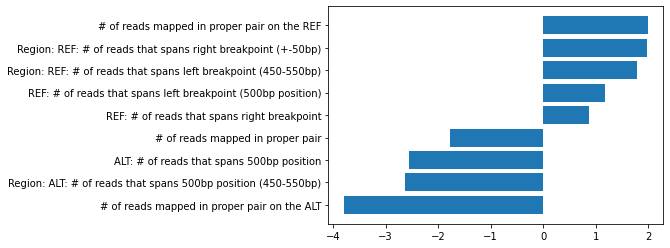

In [21]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [22]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale

0.9196860996958509


## Random Forest

In [23]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [24]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[184   2   0]
 [  2  90   3]
 [  1   5  81]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.93      0.95      0.94        95
           2       0.96      0.93      0.95        87

    accuracy                           0.96       368
   macro avg       0.96      0.96      0.96       368
weighted avg       0.96      0.96      0.96       368

0.9646739130434783


In [25]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.9428199948921548


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [26]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [27]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.9203663718046947


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[[ 1.24341259e+00 -2.14961878e+00 -9.06206190e-01  4.82375861e-01
   5.36774083e-01 -2.64380684e+00  1.24001334e+00  6.83842345e-01
  -2.73219985e+00]
 [ 1.10489957e+00 -1.86537127e+00 -7.60471699e-01  8.36775438e-01
   5.17042691e-01 -8.79978616e-01  1.01586832e+00  1.23132969e+00
  -9.00577297e-01]
 [ 1.13435807e-01 -3.51573253e-01 -2.38137446e-01  1.54590846e-01
   1.90912148e-01 -2.48714950e-01  5.04552984e-02  2.14385058e-01
  -2.48714950e-01]
 [ 6.28838391e-02 -1.43362143e-01 -8.04783035e-02  7.39765116e-01
   6.77870996e-01 -1.95263299e+00  1.16518023e+00  1.38967581e+00
  -1.77877361e+00]
 [ 2.55712201e-03 -4.88927378e-03 -2.33215177e-03  2.63662842e-03
  -2.14322986e-03 -1.01715422e-02 -6.60990535e-03  1.59893162e-03
   2.21795767e-02]
 [-3.34812451e-01 -8.70417909e-02 -4.21854242e-01  1.91743382e-01
   1.79024917e-01  4.45767233e-01  3.12659555e-03  4.06260624e-01
   5.13625286e-01]]


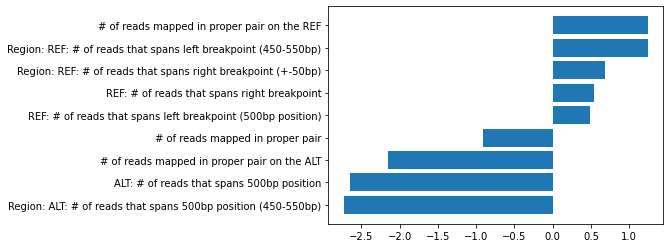

array([2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2,

In [28]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [29]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[183   3   0]
 [  3  82  10]
 [  1  12  74]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.85      0.86      0.85        95
           2       0.88      0.85      0.87        87

    accuracy                           0.92       368
   macro avg       0.90      0.90      0.90       368
weighted avg       0.92      0.92      0.92       368

0.9211956521739131


### Using rbf (with non-linear boundary) as kernel

In [30]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.915602145294978


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [31]:
clf = svm.SVC(kernel="rbf", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
pred_lin = clf.predict(X_test)
pred_lin

array([2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2,

In [32]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[184   2   0]
 [  4  83   8]
 [  1  12  74]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       186
           1       0.86      0.87      0.86        95
           2       0.90      0.85      0.88        87

    accuracy                           0.93       368
   macro avg       0.91      0.90      0.91       368
weighted avg       0.93      0.93      0.93       368

0.9266304347826086


## MLP - Multi-layer perceptron

In [33]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

ValueError: Shape of passed values is (1837, 9), indices imply (1837, 3)

In [ ]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "0/1", "1/1", "./."])
df_GIAB_2_y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(10, activation='relu', name='layer_3')) # tahn
    model.add(Dense(4, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

In [ ]:
history = estimator.fit(X_train, y_train)

In [ ]:
history.history["accuracy"]

In [ ]:
history.history["loss"]

In [ ]:
estimator.predict(X_test)

In [ ]:
y_test

In [ ]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

In [ ]:
y_test = y_test2["genotype"].to_numpy()

In [ ]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [ ]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model().fit(X_train, y_train, epochs=200)

In [ ]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 